In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_financial_data = pd.read_csv('crypto_financial_data.csv')
df_financial_data['Date'] = pd.to_datetime(df_financial_data['Date'], format='%Y-%m-%d')
df_financial_data.head()

,Date,Bitcoin,Ethereum,Cardano,XRP,Dogecoin,Gold,SP500,Nasdaq,US_Bond
0,2018-07-01,6366.8,452.57,0.1421,0.46226,0.002536,1241.7,2726.71,7097.82,2.871
1,2018-07-02,6619.5,475.70,0.1544,0.49005,0.002735,1241.7,2726.71,7097.82,2.871
2,2018-07-03,6513.5,461.89,0.1498,0.48516,0.002655,1253.5,2713.22,7014.55,2.833
3,2018-07-04,6598.4,467.52,0.1514,0.49194,0.002688,1253.5,2713.22,7014.55,2.833
4,2018-07-05,6546.5,468.47,0.1475,0.47779,0.002614,1261.7,2736.61,7101.05,2.833


In [3]:
df_btc_statistics = pd.read_csv('bitcoin_statistics.csv')
df_btc_statistics['date_day'] = pd.to_datetime(df_btc_statistics['date_day'], format='%Y-%m-%d')
df_btc_statistics.head()

,date_day,transactions_count,average_transaction_value,average_fee,address_count
0,2020-02-16,292236,3.292062e+08,7391.07,424646
1,2020-06-11,332490,3.010713e+08,11607.08,726867
2,2018-10-28,219860,2.376771e+08,7511.11,382562
3,2019-01-25,301085,6.073303e+08,8244.65,418470
4,2019-10-05,326683,1.524697e+08,5861.37,404619


In [4]:
df_btc_statistics = pd.merge(df_financial_data[['Date','Bitcoin']],
                             df_btc_statistics,
                             how='left',
                             left_on='Date',
                             right_on='date_day')
df_btc_statistics = df_btc_statistics.drop(['date_day'], axis=1)
df_btc_statistics.head()

,Date,Bitcoin,transactions_count,average_transaction_value,average_fee,address_count
0,2018-07-01,6366.8,156247,5.490050e+08,10747.66,326089
1,2018-07-02,6619.5,199294,5.002205e+08,11781.91,444107
2,2018-07-03,6513.5,216747,4.898527e+08,12873.35,452632
3,2018-07-04,6598.4,206788,4.298247e+08,10418.66,407761
4,2018-07-05,6546.5,199600,5.167851e+08,9902.81,359493


In [5]:
# Scaling function to view relationships between different Coins / Indicies
def price_scaling(price_data):
    return (price_data - min(price_data)) / (max(price_data) - min(price_data))

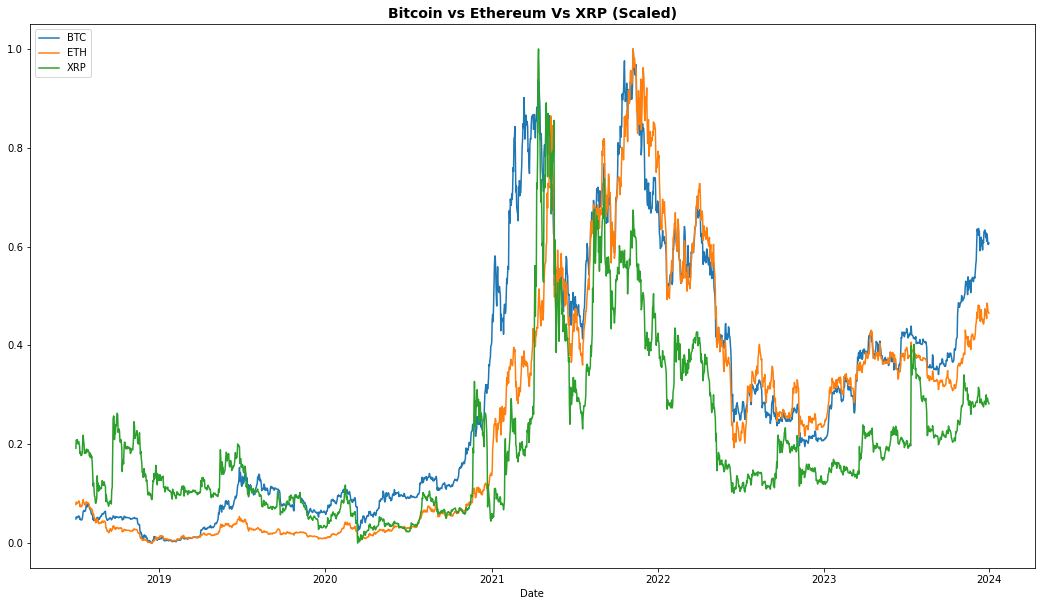

In [6]:
# Plot of the three largest Cryptocurrencies
plt.figure(figsize=(18,10))
plt.plot(df_financial_data['Date'], price_scaling(df_financial_data['Bitcoin']))
plt.plot(df_financial_data['Date'], price_scaling(df_financial_data['Ethereum']))
plt.plot(df_financial_data['Date'], price_scaling(df_financial_data['XRP']))
plt.xlabel('Date')
plt.title('Bitcoin vs Ethereum Vs XRP (Scaled)', fontsize=14, fontweight='bold')
plt.legend(['BTC','ETH','XRP'],loc='upper left')
plt.show()

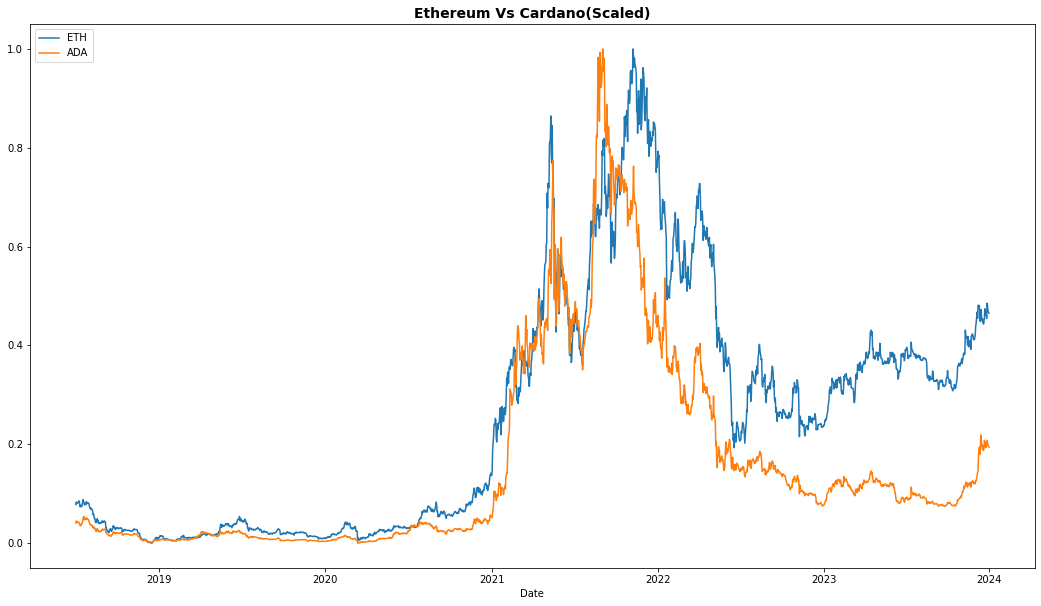

In [7]:
# Plot of the two largest Proof-of-stake Smart contract coins
plt.figure(figsize=(18,10))
plt.plot(df_financial_data['Date'], price_scaling(df_financial_data['Ethereum']))
plt.plot(df_financial_data['Date'], price_scaling(df_financial_data['Cardano']))
plt.xlabel('Date')
plt.title('Ethereum Vs Cardano(Scaled)', fontsize=14, fontweight='bold')
plt.legend(['ETH','ADA'], loc='upper left')
plt.show()

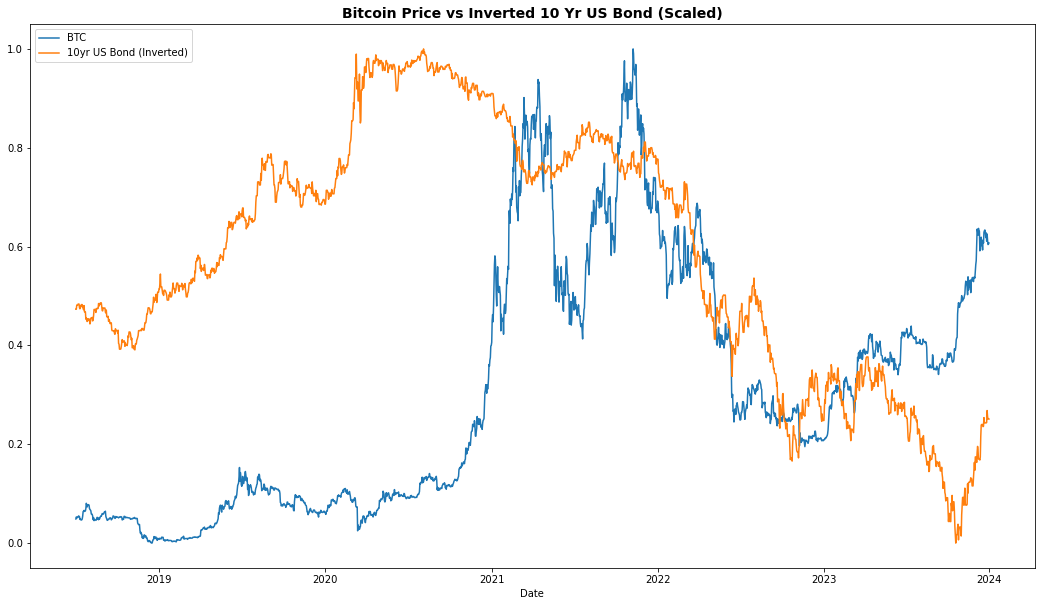

In [8]:
# Plot of the Bitcoin Prices compared with the US 10 year Bond
plt.figure(figsize=(18,10))
plt.plot(df_financial_data['Date'], price_scaling(df_financial_data['Bitcoin']))
plt.plot(df_financial_data['Date'], price_scaling(-df_financial_data['US_Bond']))
plt.xlabel('Date')
plt.title('Bitcoin Price vs Inverted 10 Yr US Bond (Scaled)', fontsize=14, fontweight='bold')
plt.legend(['BTC','10yr US Bond (Inverted)'],loc='upper left')
plt.show()

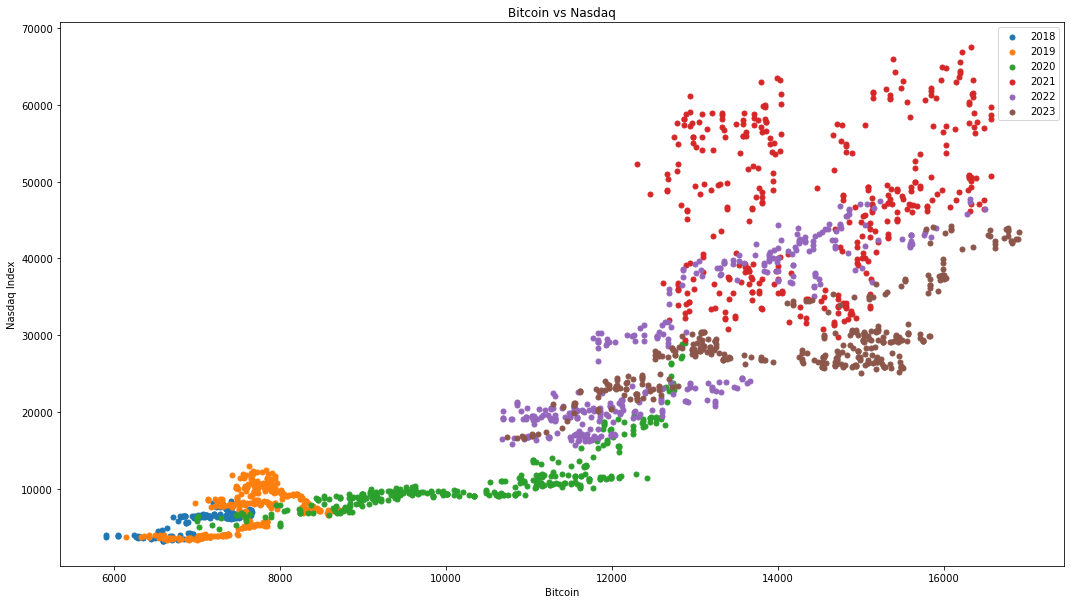

In [9]:
# Relationship betwen Bitcoin Price and Nasdaq Index, Coloured by Year

# Split the dataframe into Groups by Year
groups = df_financial_data.groupby(pd.DatetimeIndex(df_financial_data['Date']).year)
plt.figure(figsize = (18,10))

# Plot each Year in a different colour
for name, group in groups:
    plt.scatter(y = group['Bitcoin'], x=group['Nasdaq'], s=25, label=name)
plt.xlabel('Bitcoin')
plt.ylabel('Nasdaq Index')
plt.legend()
plt.title('Bitcoin vs Nasdaq')
plt.show()

<AxesSubplot:>

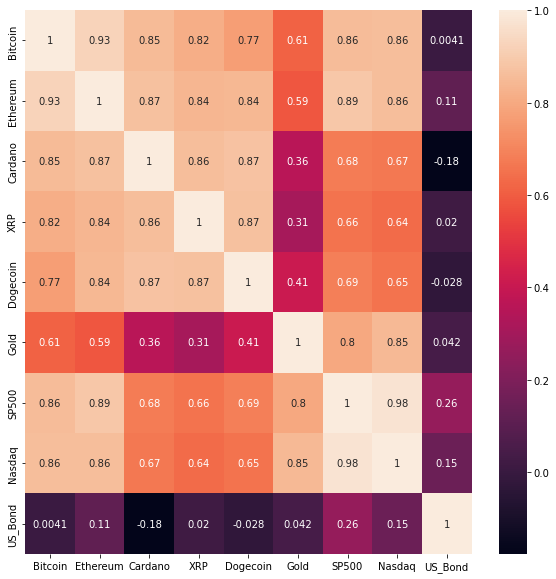

In [10]:
# Correlation Matrix of the Cryptocurrency and the Supplementary Indicies
plt.figure(figsize=(10,10))
sns.heatmap(df_financial_data.corr(), annot=True)

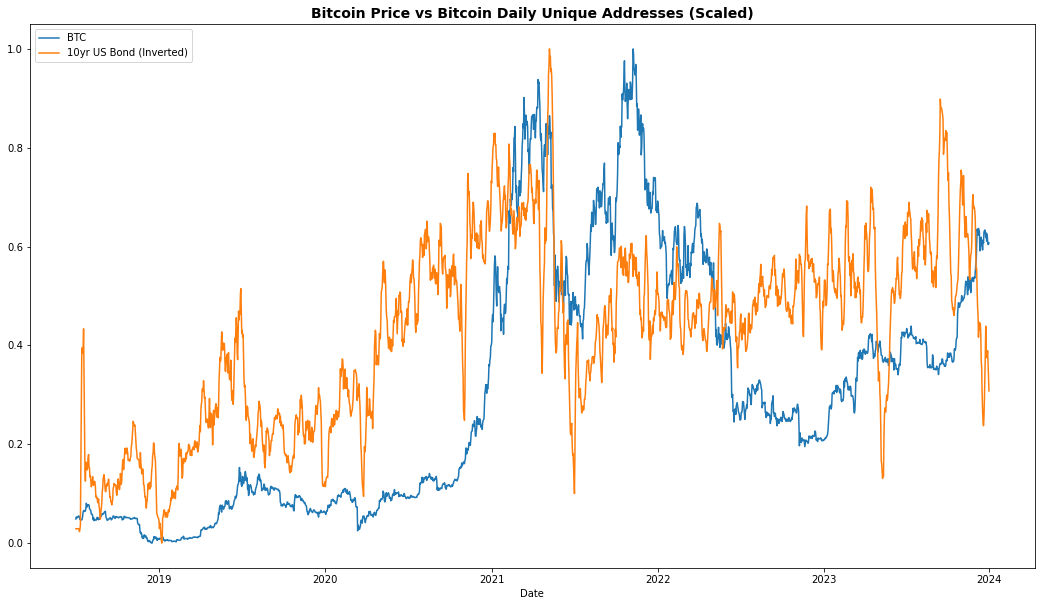

In [11]:
# Plot of the Bitcoin Prices with the Daily Unique Address count
# Daily Unique address count has been smoother with a 7-day moving average
plt.figure(figsize=(18,10))
plt.plot(df_btc_statistics['Date'], price_scaling(df_btc_statistics['Bitcoin']))
plt.plot(df_btc_statistics['Date'], price_scaling(df_btc_statistics['address_count'].rolling(7).mean().bfill()))
plt.xlabel('Date')
plt.title('Bitcoin Price vs Bitcoin Daily Unique Addresses (Scaled)', fontsize=14, fontweight='bold')
plt.legend(['BTC','10yr US Bond (Inverted)'],loc='upper left')
plt.show()

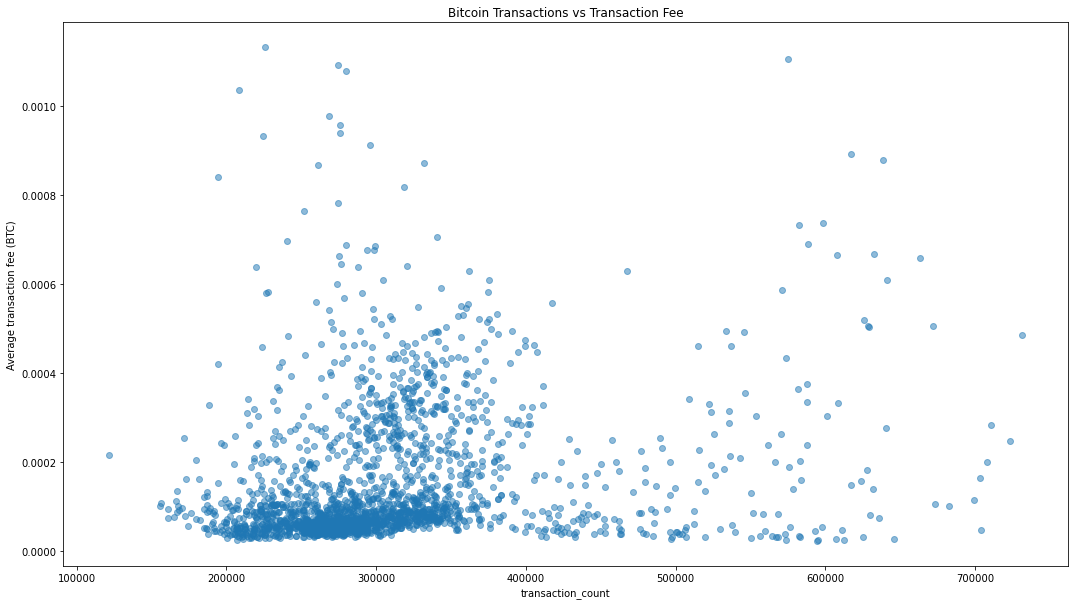

In [12]:
# Scatter Plot fo the Daily Transactions and the Transaction Fee
# Add Bitcoin Reward to colour
plt.figure(figsize=(18,10))
plt.scatter(x = df_btc_statistics['transactions_count'], y=(df_btc_statistics['average_fee']/100000000), alpha=0.5)
plt.xlabel('transaction_count')
plt.ylabel('Average transaction fee (BTC)')
plt.title('Bitcoin Transactions vs Transaction Fee')
plt.show()

Text(0, 0.5, 'Unique Address Count')

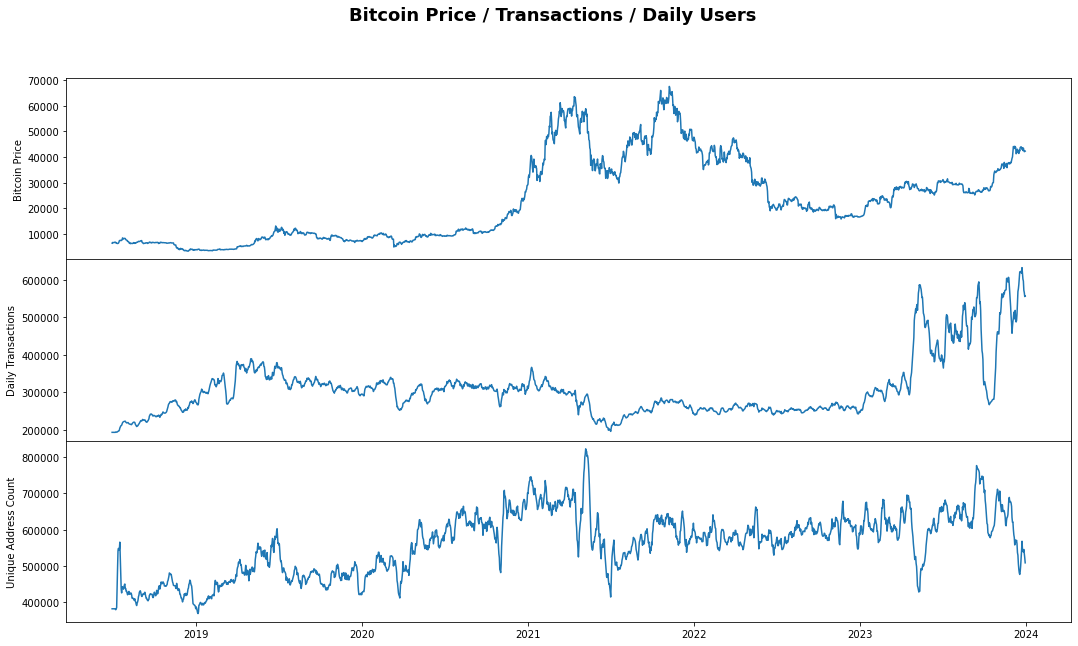

In [13]:
# Line plots of the Bitcoin Price, Transactions and Daily Address Count
fig = plt.figure(figsize=(18,10))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True)

fig.suptitle('Bitcoin Price / Transactions / Daily Users', fontsize=18, fontweight='bold')
axs[0].plot(df_btc_statistics['Date'], df_btc_statistics['Bitcoin'])
axs[0].set_ylabel('Bitcoin Price')

axs[1].plot(df_btc_statistics['Date'], df_btc_statistics['transactions_count'].rolling(7).mean().bfill())
axs[1].set_ylabel('Daily Transactions')

axs[2].plot(df_btc_statistics['Date'], df_btc_statistics['address_count'].rolling(7).mean().bfill())
axs[2].set_ylabel('Unique Address Count')